# Cotton Plant Disease Classification

- Import Libaries

In [2]:
import keras
from keras.preprocessing.image import ImageDataGenerator
from keras.optimizers import Adam
from keras.callbacks import ModelCheckpoint
import matplotlib.pyplot as plt
import tensorflow as tf

- Load Dataset

In [6]:
train_data_path = r'D:\Cotton Plant Disease Classification\Training\train'
validation_data_path = r'D:\Cotton Plant Disease Classification\Training\val'

In [7]:
# show augmented images
def plotImages(images_arr):
    fig, axes = plt.subplots(1, 5, figsize=(20, 20))
    axes = axes.flatten()
    for img, ax in zip(images_arr, axes):
        ax.imshow(img)
    plt.tight_layout()
    plt.show()

In [8]:
# this is the augmentation configuration we will use for training
# It generate more images using below parameters
training_datagen = ImageDataGenerator(rescale=1./255,
                                      rotation_range=40,
                                      width_shift_range=0.2,
                                      height_shift_range=0.2,
                                      shear_range=0.2,
                                      zoom_range=0.2,
                                      horizontal_flip=True,
                                      fill_mode='nearest')

# this is a generator that will read pictures found in
# at train_data_path, and indefinitely generate
# batches of augmented image data
training_data = training_datagen.flow_from_directory(train_data_path, # this is the target directory
                                      target_size=(150, 150), # all images will be resized to 150x150
                                      batch_size=32,
                                      class_mode='binary')  # since we use binary_crossentropy loss, we need binary labels

Found 1951 images belonging to 4 classes.


In [9]:
training_data.class_indices

{'diseased cotton leaf': 0,
 'diseased cotton plant': 1,
 'fresh cotton leaf': 2,
 'fresh cotton plant': 3}

In [10]:
# this is the augmentation configuration we will use for validation:
# only rescaling
valid_datagen = ImageDataGenerator(rescale=1./255)

# this is a similar generator, for validation data
valid_data = valid_datagen.flow_from_directory(validation_data_path,
                                  target_size=(150,150),
                                  batch_size=32,
                                  class_mode='binary')

Found 324 images belonging to 4 classes.


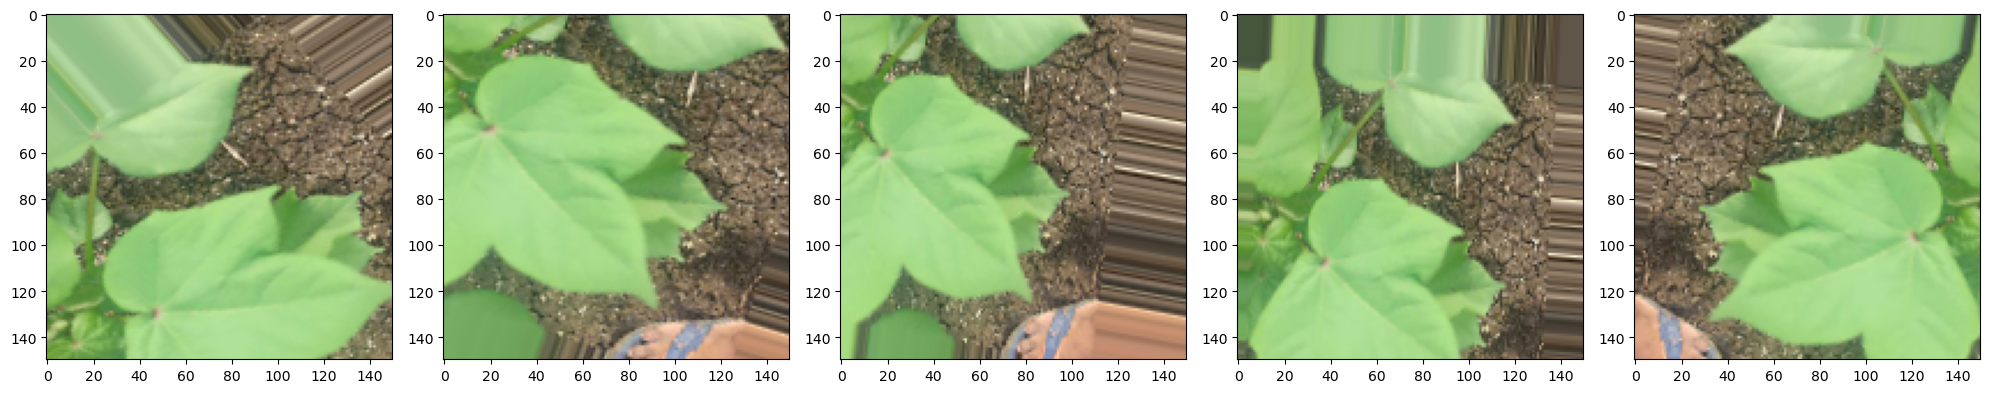

In [11]:
# showing augmented images
images = [training_data[0][0][0] for i in range(5)]
plotImages(images)

In [12]:
# save best model using vall accuracy
model_path = 'D:\Cotton Plant Disease Classification\model\cottondiseaseclassificationmodel.h5'
checkpoint = ModelCheckpoint(model_path, monitor='val_accuracy', verbose=1, save_best_only=True, mode='max')
callbacks_list = [checkpoint]

In [14]:
#Building cnn model
cnn_model = keras.models.Sequential([
                                    keras.layers.Conv2D(filters=32, kernel_size=3, input_shape=[150, 150, 3]),
                                    keras.layers.MaxPooling2D(pool_size=(2,2)),
                                    keras.layers.Conv2D(filters=64, kernel_size=3),
                                    keras.layers.MaxPooling2D(pool_size=(2,2)),
                                    keras.layers.Conv2D(filters=128, kernel_size=3),
                                    keras.layers.MaxPooling2D(pool_size=(2,2)),                                    
                                    keras.layers.Conv2D(filters=256, kernel_size=3),
                                    keras.layers.MaxPooling2D(pool_size=(2,2)),

                                    keras.layers.Dropout(0.5),                                                                        
                                    keras.layers.Flatten(), # neural network beulding
                                    keras.layers.Dense(units=128, activation='relu'), # input layers
                                    keras.layers.Dropout(0.1),                                    
                                    keras.layers.Dense(units=256, activation='relu'),                                    
                                    keras.layers.Dropout(0.25),                                    
                                    keras.layers.Dense(units=4, activation='softmax') # output layer
])


# compile cnn model
cnn_model.compile(optimizer = Adam(learning_rate=0.0001), loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [16]:
history = cnn_model.fit(training_data, 
                          epochs=50, 
                          verbose=1, 
                          validation_data= valid_data,
                          callbacks=callbacks_list)

Epoch 1/50
61/61 [==============================] - ETA: 0s - loss: 1.1280 - accuracy: 0.4936
Epoch 1: val_accuracy improved from -inf to 0.48457, saving model to D:\Cotton Plant Disease Classification\model\cottondiseaseclassificationmodel.h5
61/61 [==============================] - 68s 1s/step - loss: 1.1280 - accuracy: 0.4936 - val_loss: 1.0804 - val_accuracy: 0.4846
Epoch 2/50


c:\Users\Acer\anaconda3\Lib\site-packages\keras\src\engine\training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


61/61 [==============================] - ETA: 0s - loss: 1.0185 - accuracy: 0.5741
Epoch 2: val_accuracy improved from 0.48457 to 0.62654, saving model to D:\Cotton Plant Disease Classification\model\cottondiseaseclassificationmodel.h5
61/61 [==============================] - 36s 579ms/step - loss: 1.0185 - accuracy: 0.5741 - val_loss: 0.8591 - val_accuracy: 0.6265
Epoch 3/50
61/61 [==============================] - ETA: 0s - loss: 0.8893 - accuracy: 0.6335
Epoch 3: val_accuracy did not improve from 0.62654
61/61 [==============================] - 28s 456ms/step - loss: 0.8893 - accuracy: 0.6335 - val_loss: 0.8815 - val_accuracy: 0.6235
Epoch 4/50
61/61 [==============================] - ETA: 0s - loss: 0.8709 - accuracy: 0.6525
Epoch 4: val_accuracy improved from 0.62654 to 0.70679, saving model to D:\Cotton Plant Disease Classification\model\cottondiseaseclassificationmodel.h5
61/61 [==============================] - 29s 466ms/step - loss: 0.8709 - accuracy: 0.6525 - val_loss: 0.7316

In [19]:
model_path2 = r'D:\Cotton Plant Disease Classification\model\v4_1_pred_cott_dis.h5'
cnn_model.save(model_path2)

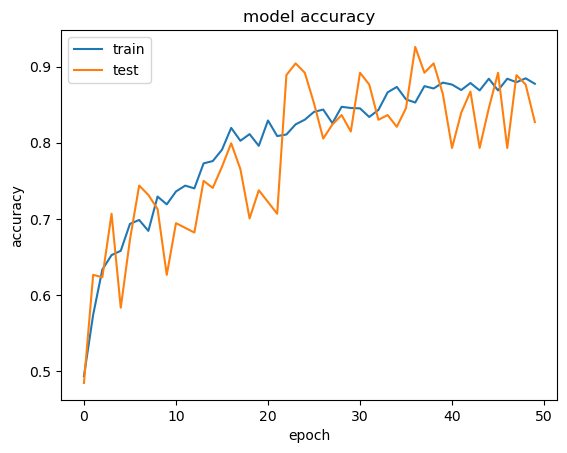

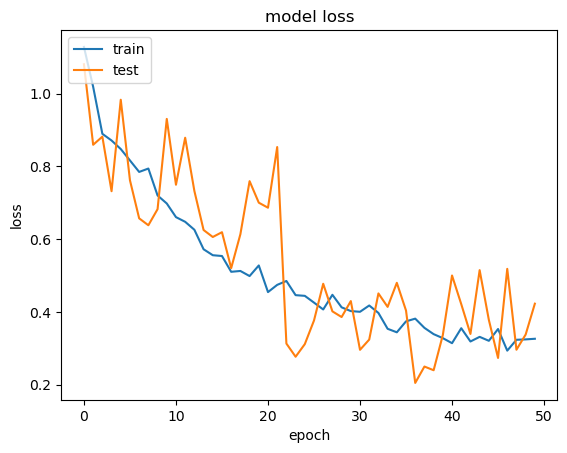

In [18]:
# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()